In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
csv = pd.read_csv(r"C:\Users\Aswin\Downloads\Project\Corizo\Minor_Stock_Price_data_set.csv")
csv

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
csv = csv.drop(["Date","Adj Close"],axis=1)

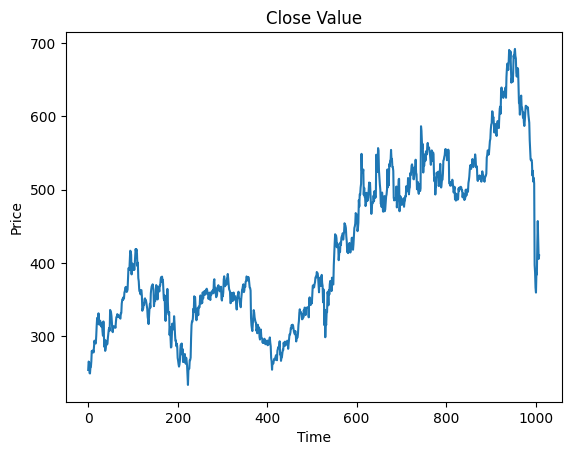

In [5]:
plt.plot(csv["Close"])
plt.title("Close Value")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [6]:
ma200 = csv["Close"].rolling(200).mean()
ma400 = csv["Close"].rolling(400).mean()

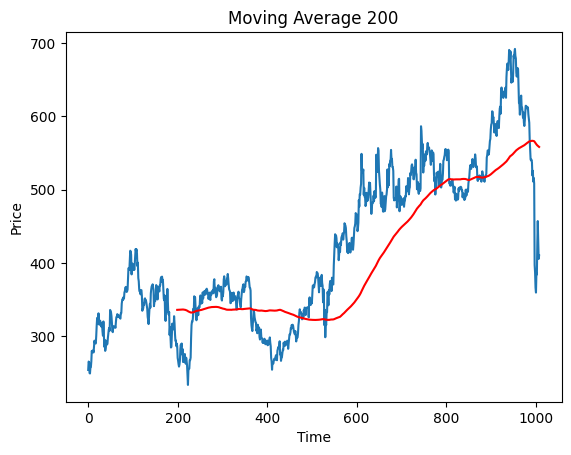

In [7]:
plt.plot(csv["Close"])
plt.plot(ma200,"r")
plt.title("Moving Average 200")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

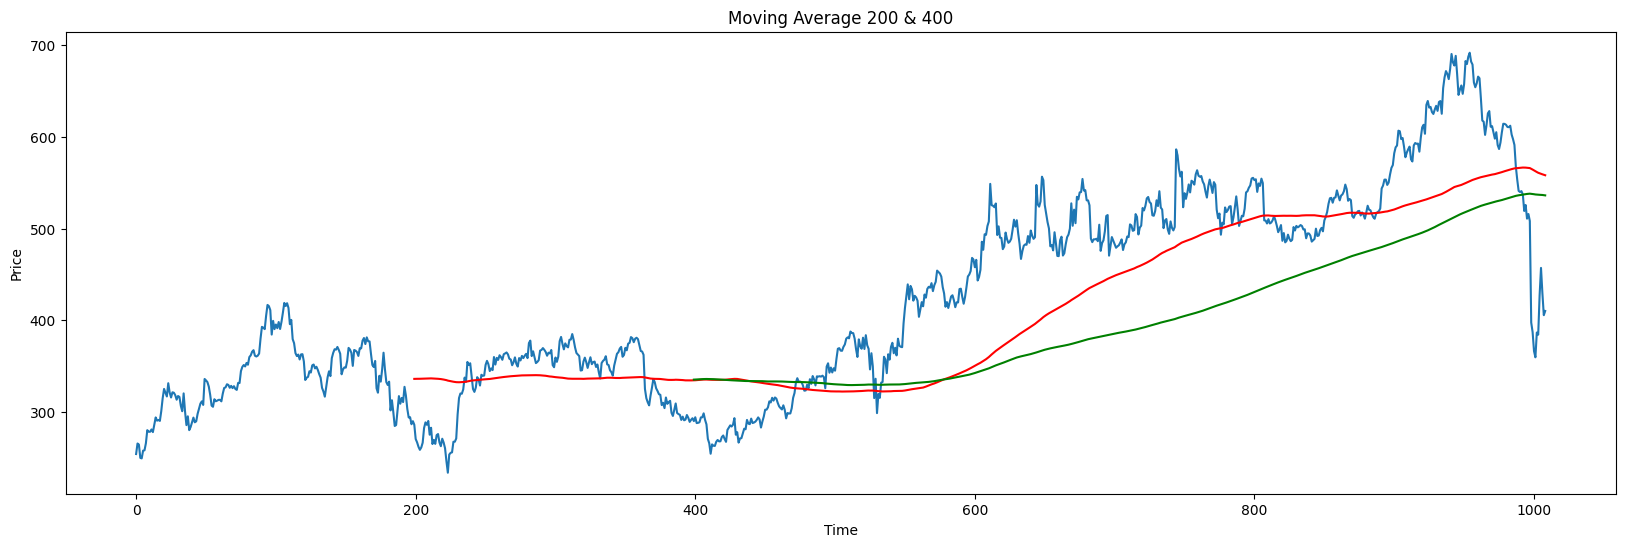

In [8]:
plt.figure(figsize=(20,6))
plt.plot(csv["Close"])
plt.plot(ma200,"r")
plt.plot(ma400,"g")
plt.title("Moving Average 200 & 400")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [9]:
data_training = pd.DataFrame(csv['Close'][0:int(len(csv)*0.7)])
data_testing = pd.DataFrame(csv['Close'][int(len(csv)*0.7):int(len(csv))])

print(data_training.shape)
print(data_testing.shape)

(706, 1)
(303, 1)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
data_training_arr = scaler.fit_transform(data_training)
data_testing_arr = scaler.fit_transform(data_testing)

print(data_training_arr.shape)
print(data_testing_arr.shape)

(706, 1)
(303, 1)


In [12]:
x_train = []
y_train = []

for i in range(100,data_training_arr.shape[0]):
    x_train.append(data_training_arr[i-100: i])
    y_train.append(data_training_arr[i, 0])

x_train,y_train  = np.array(x_train), np.array(y_train)

In [13]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()

In [18]:
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
19/19 [==============================] - 9s 158ms/step - loss: 0.1212
Epoch 2/25
19/19 [==============================] - 3s 146ms/step - loss: 0.0359
Epoch 3/25
19/19 [==============================] - 3s 147ms/step - loss: 0.0226
Epoch 4/25
19/19 [==============================] - 3s 147ms/step - loss: 0.0168
Epoch 5/25
19/19 [==============================] - 3s 151ms/step - loss: 0.0182
Epoch 6/25
19/19 [==============================] - 3s 149ms/step - loss: 0.0157
Epoch 7/25
19/19 [==============================] - 3s 159ms/step - loss: 0.0141
Epoch 8/25
19/19 [==============================] - 3s 156ms/step - loss: 0.0140
Epoch 9/25
19/19 [==============================] - 6s 337ms/step - loss: 0.0126
Epoch 10/25
19/19 [==============================] - 7s 393ms/step - loss: 0.0129
Epoch 11/25
19/19 [==============================] - 7s 396ms/step - loss: 0.0120
Epoch 12/25
19/19 [==============================] - 5s 274ms/step - loss: 0.0112
Epoch 13/25
19/19 [======

In [20]:
model.save("kernas_model.h5")

c:\Users\Aswin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
p100 = data_testing.tail(100)
final_df = pd.concat([p100, data_testing], ignore_index=True)
input_data = scaler.transform(final_df.values.reshape(-1, 1))

c:\Users\Aswin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [22]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i])
x_test = np.array(x_test)
y_test = np.array(y_test)

In [23]:
y_predicted = model.predict(x_test)
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test)

10/10 [==============================] - 3s 106ms/step


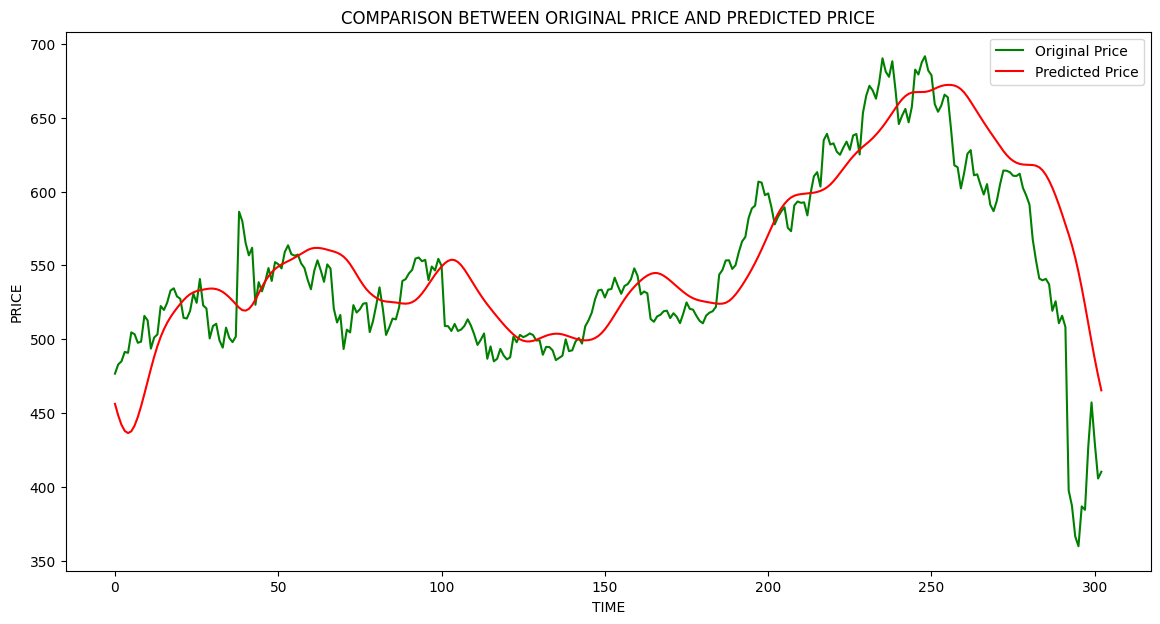

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(y_test, 'g', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.title('COMPARISON BETWEEN ORIGINAL PRICE AND PREDICTED PRICE')
plt.xlabel('TIME')
plt.ylabel('PRICE')
plt.legend()
plt.show()